In [1]:
import scipy.stats
import numpy as np 
import matplotlib.pyplot as plt

# PDF analítica conforme livros

In [2]:
def logn_analitica(x, μ, σ):
    """
    μ e σ são média e desvio padrão da variável X
    Função conforme livro do Beck (2019)
    """
    ξ = np.sqrt(np.log(1+(σ/μ)**2))
    λ = np.log(μ) - 0.5*ξ**2
    
    # Printa variáveis locais
    print(f"λ={λ:.3f} | ξ={ξ:.3f}")

    # Calcula PDF
    pdf = 1/(x*ξ*np.sqrt(2*np.pi))*np.exp(-1/2*((np.log(x)-λ)/ξ)**2)
    return pdf


λ=-0.347 | ξ=0.833


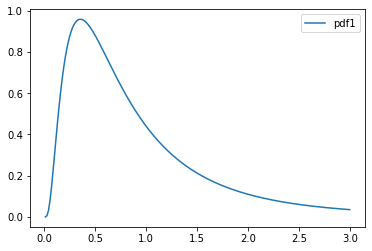

In [3]:
x = np.linspace(0.01,3,200)
pdf1 = logn_analitica(x, μ=1, σ=1)
plt.plot(x, pdf1, label='pdf1')
plt.legend()

In [4]:
for x in [0.4, 0.5, 0.8, 1.0, 1.25, 1.5, 2.0]:
    pdf = logn_analitica(x, μ=1, σ=1)
    print(f"PDF({x:.3f}, μ=1, σ=1)={pdf:.4f}")

λ=-0.347 | ξ=0.833
PDF(0.400, μ=1, σ=1)=0.9479
λ=-0.347 | ξ=0.833
PDF(0.500, μ=1, σ=1)=0.8788
λ=-0.347 | ξ=0.833
PDF(0.800, μ=1, σ=1)=0.5924
λ=-0.347 | ξ=0.833
PDF(1.000, μ=1, σ=1)=0.4394
λ=-0.347 | ξ=0.833
PDF(1.250, μ=1, σ=1)=0.3033
λ=-0.347 | ξ=0.833
PDF(1.500, μ=1, σ=1)=0.2124
λ=-0.347 | ξ=0.833
PDF(2.000, μ=1, σ=1)=0.1099


# SciPy

In [5]:
def logn_scipy(x, μ, σ):
    """
    μ e σ são média e desvio padrão da variável X
    Função conforme livro do Beck (2019)
    """
    ξ = np.sqrt(np.log(1+(σ/μ)**2))
    λ = np.log(μ) - 0.5*ξ**2

    # Printa variáveis locais
    print(f"λ={λ:.3f} | ξ={ξ:.3f}")

    # Cria objeto logn
    logn = scipy.stats.lognorm(scale=np.exp(λ), s=ξ)

    # Calcula PDF
    pdf = logn.pdf(x)

    return pdf


In [6]:
def logn_norm(x, μ, σ):
    """
    μ e σ são média e desvio padrão da variável X
    Função conforme livro do Beck (2019)
    """
    ξ = np.sqrt(np.log(1+(σ/μ)**2))
    λ = np.log(μ) - 0.5*ξ**2
    # Printa variáveis locais
    print(f"λ={λ:.3f} | ξ={ξ:.3f}")
    
    # Cria objeto normal
    norm = scipy.stats.norm(λ, ξ)
    pdf = norm.pdf(np.log(x))/x

    return pdf

In [7]:
def plota(μ, σ):
    x = np.linspace(μ-4*σ, μ+4*σ, 1000)
    pdf1 = logn_analitica(x, μ=μ, σ=σ)
    pdf2 = logn_scipy(x, μ=μ, σ=σ)
    pdf3 = logn_norm(x, μ=μ, σ=σ)

    pdf1 = np.nan_to_num(pdf1)
    erro = np.max([np.abs(pdf1-pdf2), np.abs(pdf1-pdf3)])
    print(f'Erro máximo absoluto: {erro:.4E}')

    plt.plot(x, pdf1, 'b', label='pdf analitica', zorder=1)
    plt.plot(x, pdf2, 'g--', label='pdf scipy1', zorder=2)
    plt.plot(x, pdf3, 'r:', label='pdf ln(norm)', zorder=3)
    plt.legend()

λ=3.681 | ξ=0.125
0.07994363825448567
λ=3.681 | ξ=0.125
λ=3.681 | ξ=0.125
λ=3.681 | ξ=0.125
Erro máximo absoluto: 1.3878E-16


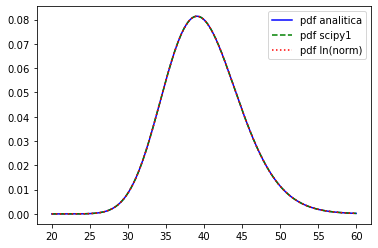

In [8]:
print(logn_norm(40, μ=40, σ=5))
plota(μ=40, σ=5)

λ=-0.297 | ξ=1.407
λ=-0.297 | ξ=1.407
λ=-0.297 | ξ=1.407
Erro máximo absoluto: NAN


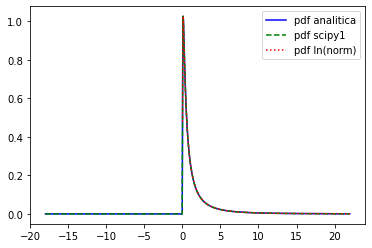

In [9]:
plota(μ=2, σ=5)

λ=3.907 | ξ=0.100
λ=3.907 | ξ=0.100
λ=3.907 | ξ=0.100
Erro máximo absoluto: 2.2204E-16


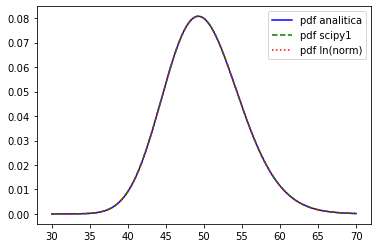

In [10]:
plota(μ=50, σ=0.1*50)

λ=3.912 | ξ=0.010
λ=3.912 | ξ=0.010
λ=3.912 | ξ=0.010
Erro máximo absoluto: 1.3878E-14


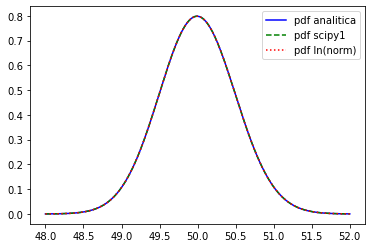

In [11]:
plota(μ=50, σ=0.01*50)

In [12]:
logn_scipy(x=2, μ=2, σ=5)

λ=-0.297 | ξ=1.407


0.11063573376578976